<font size="+5">#09. Cluster Analysis con k-Means</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data
> - This dataset contains **statistics** (columns)
> - About **Car Models** (rows)

In [84]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
buick century,22.4,6,231.0,110.0,3415,15.8,81,usa
ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
subaru,32.3,4,97.0,67.0,2065,17.8,81,japan
pontiac lemans v6,21.5,6,231.0,115.0,3245,15.4,79,usa
toyota starlet,39.1,4,79.0,58.0,1755,16.9,81,japan
chevrolet concours,17.5,6,250.0,110.0,3520,16.4,77,usa
pontiac phoenix lj,19.2,6,231.0,105.0,3535,19.2,78,usa
mazda rx2 coupe,19.0,3,70.0,97.0,2330,13.5,72,japan
dodge aspen,19.1,6,225.0,90.0,3381,18.7,80,usa


In [85]:
dfclean=df.dropna()
dfclean

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa


In [86]:
X=dfclean[['mpg','horsepower']]

# Data `preprocessing`

> - Do you need to *transform* the data
> - To get a **truthful insight** of the model?

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler=MinMaxScaler()

In [130]:
import pandas as pd

In [131]:
vnorm = scaler.fit_transform(X)

In [142]:
X.columns

Index(['mpg', 'horsepower'], dtype='object')

In [144]:
X.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='name', length=392)

In [145]:
dfnorm = pd.DataFrame(vnorm, columns=X.columns, index=X.index)
dfnorm.head()

,mpg,horsepower
name,,
chevrolet chevelle malibu,0.239362,0.456522
buick skylark 320,0.159574,0.646739
plymouth satellite,0.239362,0.565217
amc rebel sst,0.186170,0.565217
ford torino,0.212766,0.510870


# `KMeans()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

In [170]:
from sklearn.cluster import KMeans

In [195]:
error=[]

In [196]:
error

[]

In [197]:
model=KMeans(n_clusters=1)

In [198]:
model.fit(X=dfnorm)

KMeans(n_clusters=1)

In [199]:
inercia=model.score(X=dfnorm)

In [200]:
inercia

-33.95849132315868

In [201]:
error.append(inercia)

In [202]:
error

[-33.95849132315868]

In [203]:
model=KMeans(n_clusters=2)

In [204]:
model.fit(X=dfnorm)

KMeans(n_clusters=2)

In [205]:
inercia = model.score(X=dfnorm)

In [206]:
inercia

-13.693819371156273

In [207]:
error.append(inercia)

In [208]:
error

[-33.95849132315868, -13.693819371156273]

In [214]:
error = []

In [215]:
for pepa in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

    model=KMeans(n_clusters=pepa)

    model.fit(X=dfnorm)

    inercia = model.score(X=dfnorm)

    error.append(inercia)

    error

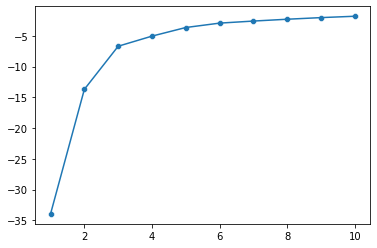

In [240]:
sns.scatterplot(y=error, x=list(range(1, 11)))
sns.lineplot(y=error, x=list(range(1, 11)));

In [217]:
import matplotlib.pyplot as plt

In [222]:
dfgroup = dfsel.groupby('cluster')

In [223]:
dfgroup.get_group(0)

,mpg,horsepower,cluster
name,,,
toyota corona mark ii,0.398936,0.266304,0
plymouth duster,0.345745,0.266304,0
amc hornet,0.239362,0.277174,0
ford maverick,0.319149,0.211957,0
datsun pl510,0.478723,0.228261,0
...,...,...,...
buick century limited,0.425532,0.347826,0
chrysler lebaron medallion,0.452128,0.250000,0
ford granada l,0.345745,0.358696,0


In [224]:
dfgroup.get_group(1)

,mpg,horsepower,cluster
name,,,
chevrolet chevelle malibu,0.239362,0.456522,1
buick skylark 320,0.159574,0.646739,1
plymouth satellite,0.239362,0.565217,1
amc rebel sst,0.186170,0.565217,1
ford torino,0.212766,0.510870,1
...,...,...,...
mercury grand marquis,0.199468,0.500000,1
dodge st. regis,0.244681,0.483696,1
buick estate wagon (sw),0.210106,0.592391,1


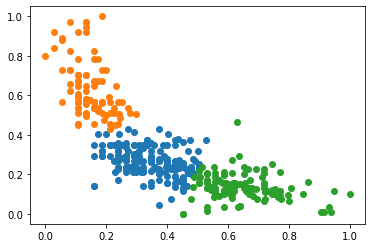

In [227]:
plt.scatter(x='mpg', y='horsepower', data=dfgroup.get_group(0))
plt.scatter(x='mpg', y='horsepower', data=dfgroup.get_group(1))
plt.scatter(x='mpg', y='horsepower', data=dfgroup.get_group(2))

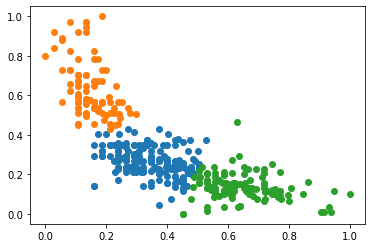

In [228]:
for pepa in [0, 1, 2]:
    plt.scatter(x='mpg', y='horsepower', data=dfgroup.get_group(pepa))

In [216]:
error

[-33.95849132315868,
 -13.69228788231525,
 -6.681090554518974,
 -5.03563742403076,
 -3.6352996854224835,
 -2.9218226313415245,
 -2.5867310479612726,
 -2.2881152957361577,
 -2.0246498807548163,
 -1.8030161752166614]

In [230]:
df.mpg

name
chevrolet chevelle malibu    18.0
buick skylark 320            15.0
plymouth satellite           18.0
amc rebel sst                16.0
ford torino                  17.0
                             ... 
ford mustang gl              27.0
vw pickup                    44.0
dodge rampage                32.0
ford ranger                  28.0
chevy s-10                   31.0
Name: mpg, Length: 398, dtype: float64

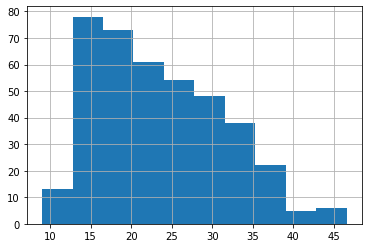

In [233]:
df.mpg.hist();

In [234]:
df.mpg.sort_values()

name
hi 1200d                 9.0
ford f250               10.0
chevy c20               10.0
chevrolet impala        11.0
oldsmobile omega        11.0
                        ... 
vw dasher (diesel)      43.4
vw pickup               44.0
vw rabbit c (diesel)    44.3
honda civic 1500 gl     44.6
mazda glc               46.6
Name: mpg, Length: 398, dtype: float64

In [235]:
df.mpg.quantile(q=[0.1, 0.9])

0.1    14.00
0.9    34.33
Name: mpg, dtype: float64

In [147]:
model=KMeans(n_clusters=3)

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [242]:
X

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0
...,...,...
ford mustang gl,27.0,86.0
vw pickup,44.0,52.0
dodge rampage,32.0,84.0


In [148]:
model.fit(X)

KMeans(n_clusters=3)

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

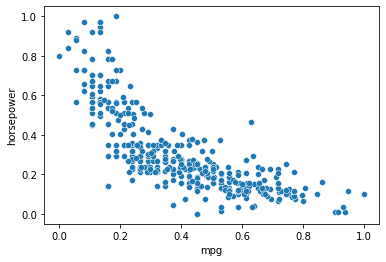

In [149]:
sns.scatterplot(x='mpg', y='horsepower', data=dfnorm)

### Finally `fit()` the Model

## `predict()` the *cluster* for every row

> - `model.` + `↹`

In [150]:
pred=model.predict(X=dfnorm)

In [151]:
dfnorm

,mpg,horsepower
name,,
chevrolet chevelle malibu,0.239362,0.456522
buick skylark 320,0.159574,0.646739
plymouth satellite,0.239362,0.565217
amc rebel sst,0.186170,0.565217
ford torino,0.212766,0.510870
...,...,...
ford mustang gl,0.478723,0.217391
vw pickup,0.930851,0.032609
dodge rampage,0.611702,0.206522


In [152]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [153]:
dfsel=dfnorm.copy()

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [154]:
dfsel['cluster'] = pred

In [155]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,

In [156]:
dfsel.sample(20)

,mpg,horsepower,cluster
name,,,
nissan stanza xe,0.718085,0.228261,2
saab 99e,0.425532,0.266304,0
chevrolet cavalier,0.505319,0.228261,0
pontiac catalina,0.132979,0.972826,1
plymouth fury,0.239362,0.266304,0
volkswagen super beetle,0.452128,0.000000,2
amc hornet sportabout (sw),0.239362,0.347826,0
toyota tercel,0.763298,0.086957,2
dodge coronet custom,0.159574,0.565217,1


## Model Visualization

> - You may `hue=` the points with the `cluster` column

In [157]:
dfsel.cluster

name
chevrolet chevelle malibu    1
buick skylark 320            1
plymouth satellite           1
amc rebel sst                1
ford torino                  1
                            ..
ford mustang gl              0
vw pickup                    2
dodge rampage                2
ford ranger                  2
chevy s-10                   2
Name: cluster, Length: 392, dtype: int32

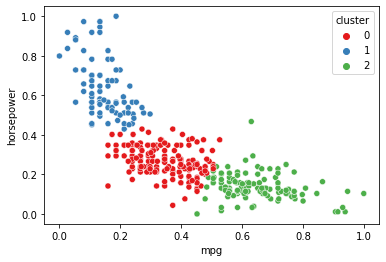

In [158]:
sns.scatterplot(x='mpg', y='horsepower', data=dfsel,hue=dfsel.cluster, palette='Set1');

## Model Interpretation

In [159]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - Can you put a **`nickname` to each group**?
> - Observe the `centroids` within `model.` + `↹`

In [160]:
model.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'auto',
 'feature_names_in_': array(['mpg', 'horsepower'], dtype=object),
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 4.331440219790644e-06,
 '_algorithm': 'elkan',
 '_n_threads': 8,
 'cluster_centers_': array([[0.34639843, 0.26521132],
        [0.14790491, 0.62805013],
        [0.64440333, 0.13516068]]),
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
   

In [161]:
dfcentroides = pd.DataFrame(model.cluster_centers_, columns=['mpg', 'horsepower'])
dfcentroides


,mpg,horsepower
0,0.346398,0.265211
1,0.147905,0.628050
2,0.644403,0.135161


## Model Visualization with Centroids

> - I want to see the `centroid`
> - with a **big `markers="X"`** in the plot

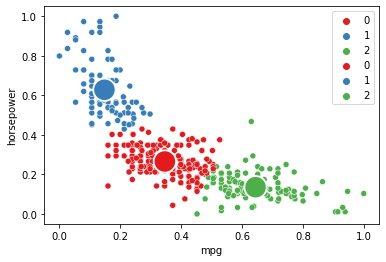

In [162]:
sns.scatterplot(x='mpg', y='horsepower', data=dfsel,hue=dfsel.cluster, palette='Set1');
sns.scatterplot(x='mpg', y='horsepower', data=dfcentroides,hue=dfcentroides.index, palette='Set1', s=500);

In [166]:
a = dfnorm.sample()

In [167]:
a

,mpg,horsepower
name,,
mazda glc custom,0.585106,0.119565


In [168]:
model.predict(a)

array([2], dtype=int32)

In [169]:
model.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'auto',
 'feature_names_in_': array(['mpg', 'horsepower'], dtype=object),
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 4.331440219790644e-06,
 '_algorithm': 'elkan',
 '_n_threads': 8,
 'cluster_centers_': array([[0.34639843, 0.26521132],
        [0.14790491, 0.62805013],
        [0.64440333, 0.13516068]]),
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
   

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [X] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - Neural Networks
    - Linear Regression
    - Variance
- [X] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [X] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [X] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

## Machine Learning

- Modelos Supervisados
    - Objetivo: tipo numerica → Regresion
    - Objetivo: tipo categorica → clasificacion
- Modelos No Supervisados
    - No hay objetivo: queremos agrupar